# Régression Linéaire Simple Numpy


In [52]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 

# Dataset
Génération de données aléatoires avec une tendance linéaire avec make_regression: on a un dataset $(x, y)$ qui contient 100 exemples, et une seule variable $x$. Note: chaque fois que la cellule est executée, des données différentes sont générer. Utiliser np.random.seed(0) pour reproduire le meme Dataset a chaque fois.

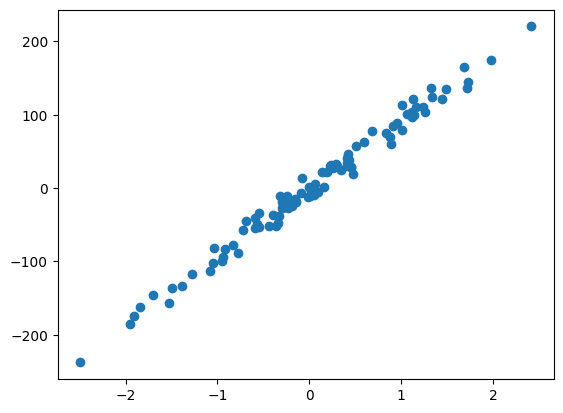

In [53]:
x,y= make_regression(n_samples=100,n_features=1,noise=10)
plt.scatter(x,y)

In [54]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


à chaque fois qu'on utilise make_regression, les dimensions de y sont incomplète, on peut réecrire les dimensions de y:

In [55]:
y= y .reshape(y.shape[0],1)  # y.shape[0]: le nombre de ligne dans y
print(y.shape)

(100, 1)


Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [56]:
# matrice X
X= np.hstack((x, np.ones(x.shape)))  # coller le vecteur x à un vecteur de 1 ayant le meme nombre
print(X.shape)
print(X[:10])

(100, 2)
[[-0.32038015  1.        ]
 [-1.52861404  1.        ]
 [ 0.8305744   1.        ]
 [ 0.88837966  1.        ]
 [ 1.33998376  1.        ]
 [-0.24642625  1.        ]
 [ 1.06793039  1.        ]
 [-0.59463161  1.        ]
 [ 0.00935441  1.        ]
 [ 0.06474304  1.        ]]


Finalement, création d'un vecteur parametre $\theta$, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1). Si on désire toujours reproduire le meme vecteur $\theta$, on utilise comme avant np.random.seed(0).

In [57]:
theta = np.random.randn(2, 1)
theta

array([[1.04968114],
       [0.69210204]])

## Modèle linéaire

On implémente un modele $F = X.\theta$,

In [58]:
def model(X,theta):
    return X.dot(theta)

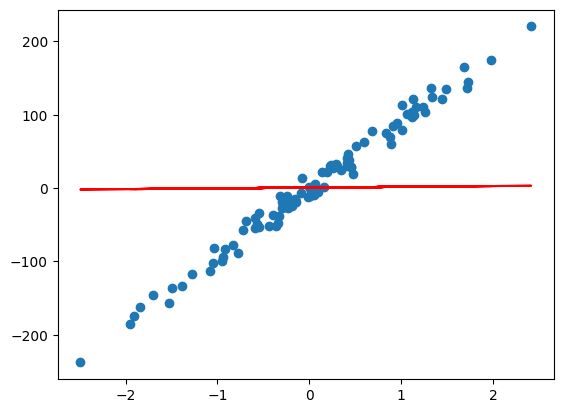

In [59]:
plt.scatter(x,y)
plt.plot(x,model(X,theta), c ='r')

## Fonction cout

# 3. Fonction Cout :  Erreur Quadratique moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne,  **Mean Squared Error (MSE)** en anglais.

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [60]:
def cost_function(X,y,theta):
    m= len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [61]:
cost_function(X,y,theta)

3559.1540665832763

## Gradient et Descente de Gradient
On implémente la formule du gradient pour la **MSE**

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$

In [62]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [63]:
def gradient_descent(X,y,theta,learning_rate, n_iterations):
    cost_history= np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta= theta - learning_rate * grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta, cost_history

![Recap](recap.png).



## Phase d'entrainement
On définit un **nombre d'itérations**, ainsi qu'un **pas d'apprentissage $\alpha$**, et c'est partit !

Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [64]:
# X.shape
theta_final, cost_history= gradient_descent(X,y,theta,learning_rate=0.01, n_iterations=1000)
theta_final

array([[91.57839339],
       [-1.06783413]])

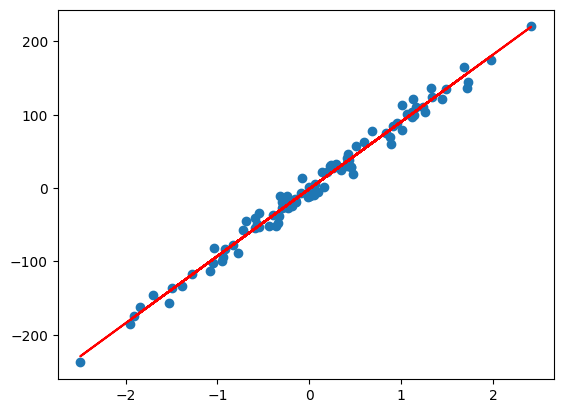

In [65]:
predictions = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c='r')

## Courbes d'apprentissage
Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas **learning_rate** est peut-etre trop élevé, il faut prendre un pas plus faible.

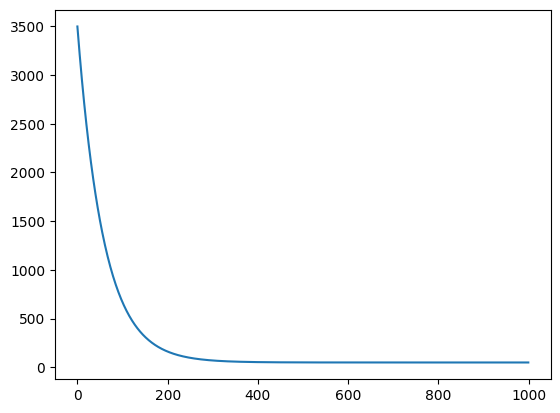

In [66]:
plt.plot(range(1000),cost_history)

Pour évaluer la réelle performance de notre modele avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le coefficient de détermination, aussi connu sous le nom R². Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele:

![Coefficient de détermination](coeff_determination.png).



In [67]:
def coef_determination(y,pred):
    u = ((y-pred)**2).sum()
    v= ((y - y.mean())**2).sum()
    return 1- u/v

In [68]:
coef_determination(y,predictions)

0.986611137728614